# Notebook to run simulations for average of shortest path among (partially) random points within circle
- Circle represents a city
- points represent stops within that city which a bus has to stop at

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [57]:
np.linspace(0,(3-1)/3,3)

array([0.        , 0.33333333, 0.66666667])

0.28529497656828423

C:\Users\mmyli\AppData\Local\Temp\ipykernel_12852\2257320966.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  plt.plot(x,[1/(2*math.pi*r_i**2) for r_i in x])


Text(0, 0.5, 'relative weight')

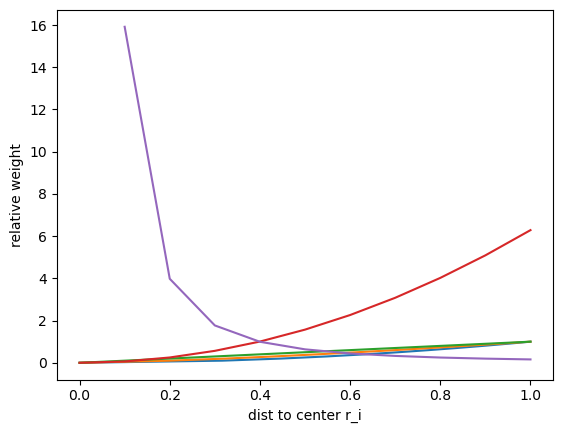

In [474]:
x = np.linspace(0,1,11)
# plt.plot([(((r_i+.2)/1.2)**.7-(.2/1.2)**.7)/(1-(.2/1.2)**.7) for r_i in x],x)
plt.plot([r_i**.5 for r_i in x],x)
plt.plot([r_i**.7 for r_i in x],x)
plt.plot([(r_i**.7)/ for r_i in x],x)
# plt.plot([r_i for r_i in x],x)
# plt.plot(x,[2*math.pi*r_i**2 for r_i in x])
# plt.plot(x,[1/(2*math.pi*r_i**2) for r_i in x])
plt.xlabel('dist to center r_i')
plt.ylabel('relative weight')

In [586]:
def c_pts_in_shp(
    n_pts:int=10,
    shape_scale:int = 1, 
    shape_name='circle',
    loc_descr_str:str='rings',#'grid', 'rings'
    min_dist:int=0,# minimum distance between pts
    poss_loc_grid_xy:np.ndarray=None, #zip(np.linspace(5,10,6),np.linspace(15,20,6))
    n_rings:int=20,#specify how many radiuses should  pts density 
    d_rings_scale=lambda r_i: r_i**.75,# r_i: r_i=even distance between rings => higher density close to center 
    n_pts_f_str:str='const_den_sym',# 'const_n', 'const_den', 'const_den_sym', 
    n_pts_ring_f=lambda r_i:24,#max(1,int(4*r_i))#r_i:1 = same amount of pointd on each ring, r_i:r_i = same point density on each ring 
    spread_ngls:bool=True, # make sense to create more even distribution 
    regular:bool=True, # specifies whether pts distrubted evenly or not if loc_descr_str in 'grid', 'rings' 
    distr_centrality:int=1,# same as d_rings_scale and n_pts_ring_f?
    plot:bool=True,#
)->list:

    fig, ax = plt.subplots(figsize=(10,10))
    ax.add_patch( plt.Circle((0., 0.), 1, facecolor='#00000005', edgecolor='#600') )
    # ax.scatter([0],[0], marker='+')

    # 0-1:4=.125, .5, 
    if loc_descr_str == 'all':
        min_dist
        poss_locs = np.array(np.meshgrid(*poss_loc_grid_xy)).T.reshape(-1,len(list(poss_loc_grid_xy)))
        
        d = np.random.random(300)**(0.5*distr_centrality)
        a = math.pi * 2 * np.random.random(300)
        pts = np.array([(di*math.cos(a[i]), di*math.sin(a[i])) for i, di in enumerate(d)])
    elif loc_descr_str == 'grid':
        pts = np.array(np.meshgrid(*poss_loc_grid_xy)).T.reshape(-1,len(list(poss_loc_grid_xy)))
    else: # loc_descr_str == 'rings':
        # if one ring it should be half way between center and edge
        # r_rings = [shape_scale*d_rings_scale(n_r) for n_r in np.linspace(1/(2*n_rings), 1-1/(2*n_rings), n_rings)]
        r_rings = [shape_scale*d_rings_scale(n_r) for n_r in np.linspace(0, 1, n_rings)]
        
        n_pts_rings = [n_pts_ring_f(rad) for rad in r_rings]
        
        if regular:
            for line in np.linspace(0,(n_pts_rings[0]-1)/n_pts_rings[0]*2*math.pi,n_pts_rings[0]):
                plt.plot([0,math.cos(line)], [0, math.sin(line)], color='#00000050', linewidth=0.5)
        
        p_ngls_rings = [
            (np.linspace(0,(n_pts_ring-1)/n_pts_ring,n_pts_ring) 
             + int(spread_ngls)* r_i%2*(n_pts_ring//2+n_pts_ring%2*r_i%4%3)/(n_pts_ring**2) # every second radial line should be offsetted
                if regular else 
            np.random.random(n_pts_ring)
            )*math.pi*2 
            for r_i, n_pts_ring in enumerate(n_pts_rings)]
        
        pts = np.array([item for sublist in 
            [[( r*math.cos(ngl), r*math.sin(ngl) ) 
            for ngl in ngls] for r_i, (r,ngls) in enumerate(zip(r_rings,p_ngls_rings))]
            for item in sublist]+[(0,0)])
        rads_m = [0]
        for r in r_rings:
            rads_m.append((r**2+1/(2*n_rings))**.5)
            # ax.add_patch( plt.Circle((0., 0.), (r**2+1/(2*n_rings))**.5, facecolor='#00000001', edgecolor='#0003') )
            ax.add_patch( plt.Circle((0., 0.), r, facecolor='#00000000', edgecolor='#00000020') )
            # ax.add_patch( plt.Circle((0., 0.), r, facecolor='#00000001', edgecolor='#000') )
        rads_m.sort()

        
        

        ax.scatter(pts[:,0],pts[:,1], alpha=.1, color='#00000000', linewidths=0.05, edgecolor='#000')
        ax.set_xlim(-1.1,1.1)
        ax.set_ylim(-1.1,1.1)
        ax.set_title(str(len(pts))+' points, ' +str(n_rings) + ' rings, ' + 
        str((1+int(spread_ngls))*n_pts_ring_f(0)) + ' axs' )

    return pts
# pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i: r_i**.75 if r_i > .3 else r_i)
# pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i: r_i**1, n_pts_ring_f=lambda r_i:48 )
# plt.plot(*pts_in_shp)


In [608]:
zip().__class__

zip

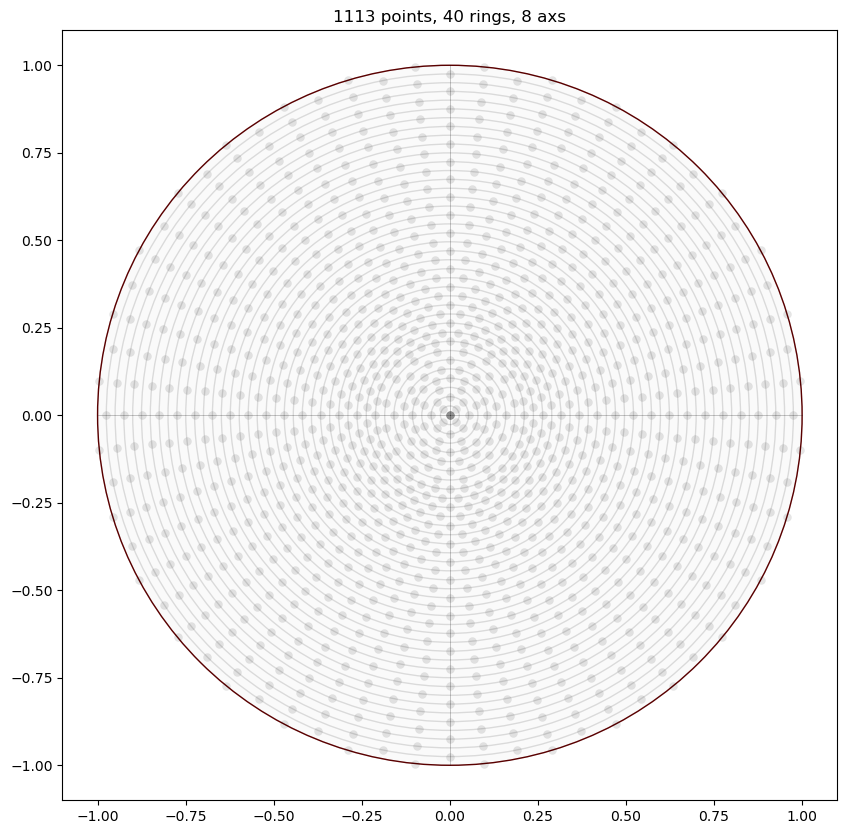

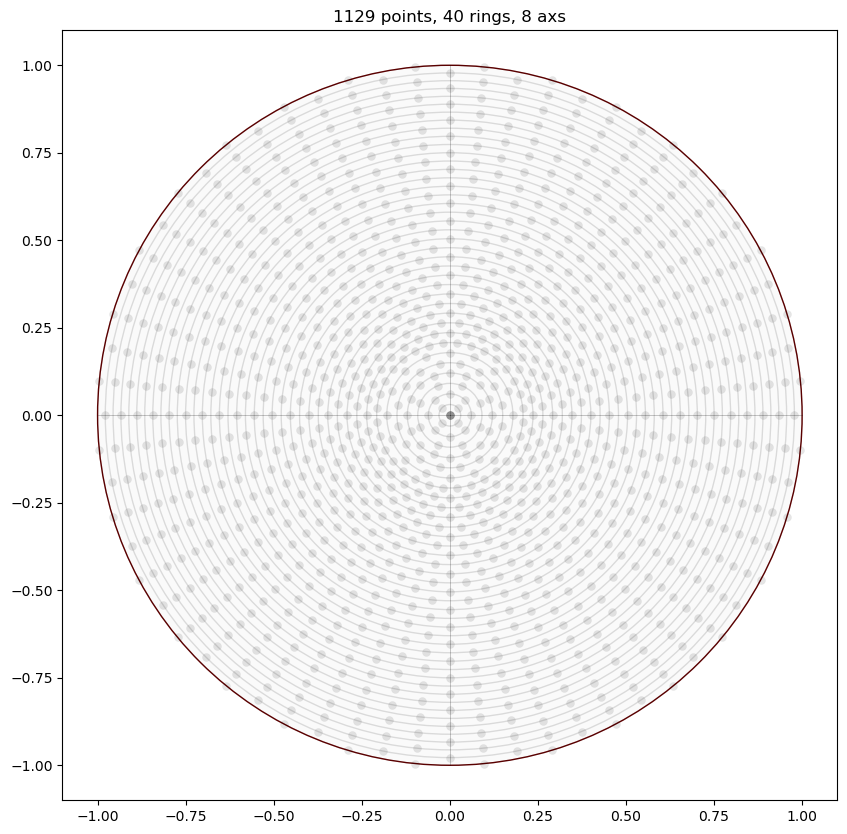

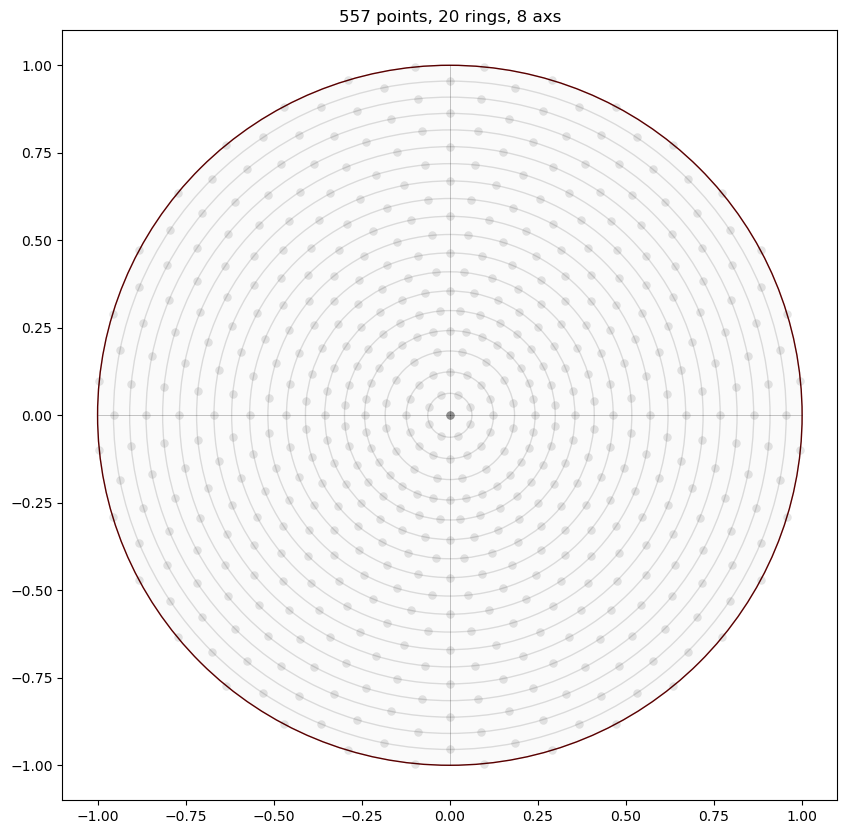

In [590]:
# scales with 
# pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i,e=2.5: ((r_i+1)**e -1.0)/((1+1)**e -1.0), n_pts_ring_f=lambda r_i:4*2**(int(r_i > .05)+int(r_i > .1)+int(r_i > .2)))
pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i,e=0.9: ((r_i+1)**e -1.0)/((1+1)**e -1.0), n_pts_ring_f=lambda r_i:4*2**(int(r_i > .05)+int(r_i > .1)+int(r_i > .2)), n_rings=40)
pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i,e=0.5: ((r_i+1)**e -1.0)/((1+1)**e -1.0), n_pts_ring_f=lambda r_i:4*2**(int(r_i > .05)+int(r_i > .1)+int(r_i > .2)), n_rings=40)
pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i,e=0.5: ((r_i+1)**e -1.0)/((1+1)**e -1.0), n_pts_ring_f=lambda r_i:4*2**(int(r_i > .05)+int(r_i > .1)+int(r_i > .2)))
# pts_in_shp = c_pts_in_shp(d_rings_scale=lambda r_i,e=1.5: ((r_i+1)**e -1.0)/((1+1)**e -1.0), n_pts_ring_f=lambda r_i:48)

In [611]:
print(sum([u+3*s for (n,u,s) in [
    (.12, .15, .73),
    (.5, .9, .86)
]]))
print(sum([u+3*s for (n,u,s) in[ 
    (.16, .19, .65),
    (.12, .16, .72)
]]))


5.82
4.460000000000001


In [2]:
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
step_distance = lambda r,c: [np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))]
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.



In [3]:

# Create a matrix of cities, with each row being a location in 2-space (function works in n-dimensions).
cities = np.random.RandomState(42).rand(70,2)

d = np.random.random(10)**.5
a = math.pi * 2 * np.random.random(10)
cities = np.array([(di*math.cos(a[i]), di*math.sin(a[i])) for i, di in enumerate(d)])
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(cities,0.001)
path_distance(route,cities)


5.21710092823665

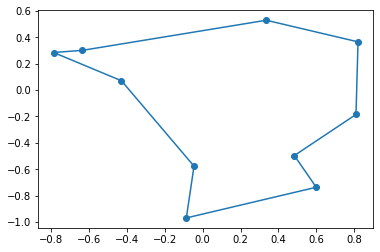

Route: [0 8 1 6 7 4 5 3 2 9]

Distance: 5.21710092823665


In [4]:
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))

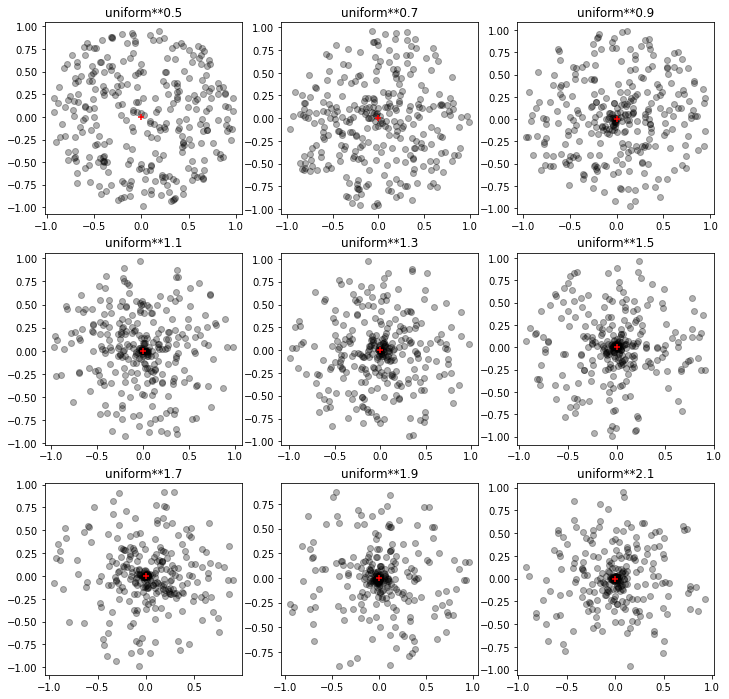

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
for i,ax in enumerate(axs.flat):
    centrality_param = 1+0.4*i

    d = np.random.random(300)**(0.5*centrality_param)
    a = math.pi * 2 * np.random.random(300)
    cities = np.array([(di*math.cos(a[i]), di*math.sin(a[i])) for i, di in enumerate(d)])
    ax.scatter(cities[:,0],cities[:,1], alpha=0.3, color='black')
    ax.scatter([0],[0], color="red", marker='+')
    ax.set_title('uniform**'+str(100*centrality_param*0.5//1/100))
plt.show()

In [6]:
N_min = 2
N_max = 60
centrality_param = 1

all_cities = [[] for n in range(N_min, N_max+1)]
all_path_lengths = [[] for n in range(N_min, N_max+1)]
all_step_lengths = [[] for n in range(N_min, N_max+1)]
all_neighbour_distances = [[] for n in range(N_min, N_max+1)]

step_distances = []
# all_neighbour_distances_after_removing_closest = [[n,[]] for n in range(N_min, N_max+1)]

N = N_min
while N <= N_max:
    for ni in range(flex_iterations(N)):
        d = np.random.random(N)**(0.5*centrality_param)
        a = math.pi * 2 * np.random.random(N)
        cities = np.array([(di*math.cos(a[i]), di*math.sin(a[i])) for i, di in enumerate(d)])
        route = two_opt(cities,0.001)
        all_cities[N-2]+=[[cities]]
        all_path_lengths[N-2] += [path_distance(route,cities)*(N-1)/N]
        all_step_lengths[N-2] += [[sorted(step_distance(route,cities))]]
        # all_neighbour_distances[N-2] += [[nearest_neighbour_distances]]
    N += 1



NameError: name 'flex_iterations' is not defined

[[ 1.14911798]
 [ 0.31897985]
 [-0.00266168]]


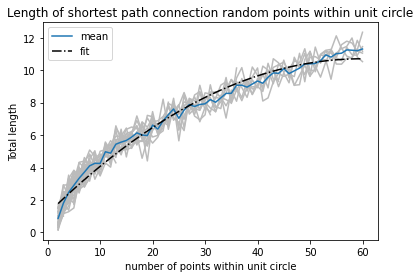

In [ ]:
per_link = False
def per_link_mult(i, per_link=per_link):
    if not per_link:
        return 1
    return 1/(i+1)

path_lengths_mean = [sum(ls)/len(ls) for ls in all_path_lengths]
path_lengths_var = [sum((ls-m)**2)/(len(ls)-1) for (ls, m) in zip(all_path_lengths, path_lengths_mean)]
path_lengths_upper = [m+2*v for (m, v) in zip(path_lengths_mean, path_lengths_var)]
path_lengths_lower = [m-2*v for (m, v) in zip(path_lengths_mean, path_lengths_var)]
x = list(range(2,len(all_cities)+2))
y1 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_mean)]
y2 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_upper)]
y3 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_lower)]

for j in range(len(all_cities[0])):
    plt.plot(x, [None if j >= len(x) else x[j]*per_link_mult(i) for i,x in enumerate(all_path_lengths)], color ='#bbbbbb')


plt.plot(x, y1, label ='mean')
# plt.plot(x, y2, '-.', label ='path_lengths_upper')
# plt.plot(x, y3, '-.', label ='path_lengths_lower')


X=np.matrix([[item for sublist in [[xs**p for i in range(len(all_path_lengths[xs-2]))] for xs in x] for item in sublist] for p in range(3)]).T
y=np.matrix([[yx] for yx in [item for sublist in [all_path_lengths[xs-2] for xs in x] for item in sublist]])

XT=X.T
XTX=XT@X
inv=np.linalg.pinv(XTX)
theta=(inv@XT)@y
print(theta)

yfitted = [sum([float(x)*(e**i) for i, x in enumerate(theta)]) for e in x]
plt.plot(x, yfitted, '-.', label ='fit', color='black')

plt.xlabel("number of points within unit circle")
plt.ylabel("Total length")
plt.legend()
plt.title('Length of shortest path connection random points within unit circle')
plt.show()
#plot (-25+28x**.2-.1x+.3x*.98**x)*.5/(x(60-.5x)) and (-25+28x**.2-.1x+.3x*.98**x)*.5/(x(60-.7x)) and (-25+28x**.2-.1x+.3x*.98**x)*.5/(x(60-.8x*.9975**x)) and (-25+28x**.2-.1x+.3x*.98**x)*.5/(x(60-.7(x/2)*.9975**x)) from 2 to 100


## Manually try to obtain best fit for function

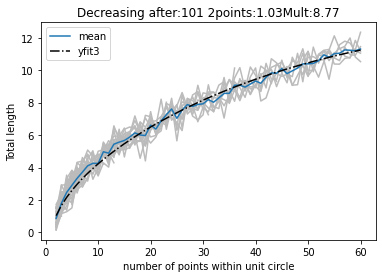

In [ ]:
for j in range(len(all_cities[0])):
    plt.plot(x, [None if j >= len(x) else x[j]*per_link_mult(i) for i,x in enumerate(all_path_lengths)], color ='#bbbbbb')
plt.plot(x, y1, label ='mean')



def fitFun(e): return 1.2*(e-1)/(e**.5) + 0.1*e - 0.0037*e**1.7
plt.plot(x, [fitFun(e) for e in x], '-.', label ='yfit3', color='black')

plt.xlabel("number of points within unit circle")
plt.ylabel("Total length")
plt.legend()
seq = [fitFun(e) for e in range(2,160)]

plt.title('Decreasing after:'+str(min([i for (i,r) in enumerate(seq) if i>2 and seq[i-1]>r]))+' 2points:'+str(fitFun(2)*100//1/100)+"Mult:"+str(9.1/fitFun(2)*100//1/100))
plt.show()

[[ 2.10369721]
 [ 0.28057039]
 [-0.00218711]]


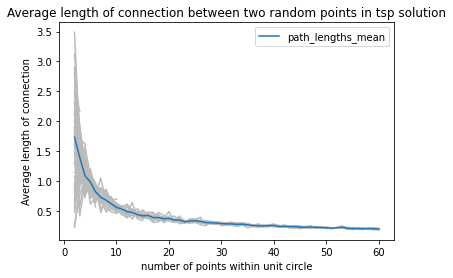

In [ ]:
per_link = True
def per_link_mult(i, per_link=per_link):
    if not per_link:
        return 1
    return 1/(i+1)

path_lengths_mean = [sum(ls)/len(ls) for ls in all_path_lengths]
path_lengths_var = [sum((ls-m)**2)/(len(ls)-1) for (ls, m) in zip(all_path_lengths, path_lengths_mean)]
path_lengths_upper = [m+2*v for (m, v) in zip(path_lengths_mean, path_lengths_var)]
path_lengths_lower = [m-2*v for (m, v) in zip(path_lengths_mean, path_lengths_var)]
x = list(range(2,len(all_cities)+2))
y1 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_mean)]
y2 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_upper)]
y3 = [x*per_link_mult(i) for i,x in enumerate(path_lengths_lower)]

for j in range(len(all_cities[0])):
    plt.plot(x, [None if j >= len(x) else x[j]*per_link_mult(i) for i,x in enumerate(all_path_lengths)], color ='#bbbbbb')


plt.plot(x, y1, label ='path_lengths_mean')
# plt.plot(x, y2, '-.', label ='path_lengths_upper')
# plt.plot(x, y3, '-.', label ='path_lengths_lower')


X=np.matrix([[item for sublist in [[xs**p for i in range(len(all_path_lengths[xs-2]))] for xs in x] for item in sublist] for p in range(3)]).T
y=np.matrix([[yx] for yx in [item for sublist in [all_path_lengths[xs-2] for xs in x] for item in sublist]])

XT=X.T
XTX=XT@X
inv=np.linalg.pinv(XTX)
theta=(inv@XT)@y
print(theta)

yfitted = [sum([float(x)*(e**i) for i, x in enumerate(theta)]) for e in x]
# plt.plot(x, yfitted, '-.', label ='fit', color='black')

plt.xlabel("number of points within unit circle")
plt.ylabel("Average length of connection")
plt.legend()
plt.title('Average length of connection between two random points in tsp solution')
plt.show()



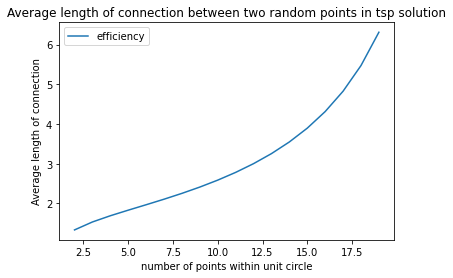

In [ ]:
basecase=7
rg = list(range(2,20))
vals = [mult*(sum([float(x)*(basecase**i) for i, x in enumerate(theta)])+basecase*0.1)/(sum([float(x)*((mult*basecase)**i) for i, x in enumerate(theta)])+mult*basecase*0.1) for mult in rg]

plt.plot(rg, vals, label ='efficiency')

plt.xlabel("number of points within unit circle")
plt.ylabel("Average length of connection")
plt.legend()
plt.title('Average length of connection between two random points in tsp solution')
plt.show()


In [ ]:
# first solve TSP
# Then look for subdivision of problem in areas where all agents contribute significantly
# when to accept the solution found?
# how to weight?
total_length = 10
n_busses = 2
min_bus_line = total_length * 1.5/((n_busses)**1.1)
min_bus_line
max_bus_line = total_length *(n_busses**1.1+1)/(2*n_busses**1.1)
max_bus_line
# choose points close to center to begin with
# each point has a set of candidates that is a share of approx min(1-2*total_length/(3/2*n_busses**1.1), ) of other points 

7.332582478842019

# Now let number of be vehicles >1 and roughly scaling with demand

### Assume: 
A vehicle does a tour for 1 hour. How many passengers can it serve? Travel times are normally distributed from 15-45 mins. So it would be maxed out at twice its capacity!
Its capacity may (in this smaller problem) be 7 passengers. So 14 passengers per vehicle.
Create pickup and dropoff locations that are correlated (on rather inside city center the other rather outside)
Possibly think of creating an area filter where those passengers remain that have pickup and dropoff within that area
Maybe start with worst passengers: Long distance, far from center, and low correlation on direction. 

#### Surface area and average distance
Sqrt(890)=30, sqrt(160)=13, 5x vs 2.5
Simple ex: small town only one market in center. Large town multiple in center and subcenter.